In [1]:
import pickle
from zipfile import ZipFile
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt

In [2]:
with ZipFile('data/9_way_dataset.zip', 'r') as zip:
    zip.printdir()
    zip.extractall(path='/home/jipe/E208-Final-Project/data')

with ZipFile('data/100_way_dataset.zip', 'r') as zip:
    zip.printdir()
    zip.extractall(path='/home/jipe/E208-Final-Project/data')

File Name                                             Modified             Size
9_way_dataset.pkl                              2023-10-19 21:18:44    161593492
File Name                                             Modified             Size
100_way_dataset.pkl                            2023-10-19 21:20:32    400855173


In [3]:
with open('data/9_way_dataset.pkl', 'rb') as f:
    loaded_data = pickle.load(f)

Data[0]: batch of data, 27999 points, each 64x62 \
Data[1]: name labels, 27999 points, string \
Data[2]: batch of data, 6003 points, each 64x62 \
Data[3]: name labels, 6003 points, string \
Data[4]: batch of data, 6003 points, each 64x62 \
Data[5]: name labels, 6003 points, string \
Data[6]: something, 27999 points, tuples (integer string, int, int) \
Data[7]: something, 6003 points, tuples (integer string, int, int) \
Data[8]: something, 6003 points, tuples (integer string, int, int)

In [4]:
print(len(loaded_data[6]))
test = np.array(loaded_data[8][0])
print(loaded_data[8][0])
print(test.shape)

27999
('508549', 7, 71)
(3,)


In [5]:
data = np.array(loaded_data[0]+loaded_data[2]+loaded_data[4])
print(data.shape)

(40005, 64, 62)


In [6]:
data = np.append(data, np.zeros((data.shape[0], 64, 2)), axis=2)
print(data.shape)

(40005, 64, 64)


In [7]:
testarr = np.array(data[0])
print(testarr.shape)

(64, 64)


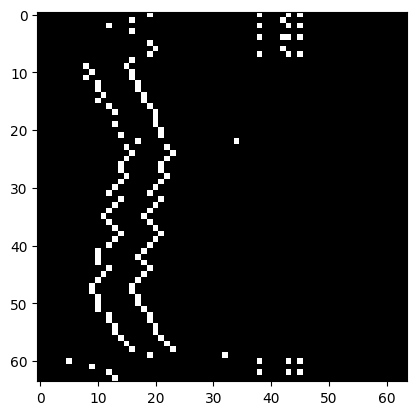

In [8]:
plt.imshow(testarr, cmap=cm.Greys_r)
plt.show()

In [9]:
# creates a unicode encoding map of the first 256 utf-8 chars

encoding_map = {}

for i in range(256):
    encoding_map[i] = chr(i+175)

In [10]:
print(encoding_map)

{0: '¯', 1: '°', 2: '±', 3: '²', 4: '³', 5: '´', 6: 'µ', 7: '¶', 8: '·', 9: '¸', 10: '¹', 11: 'º', 12: '»', 13: '¼', 14: '½', 15: '¾', 16: '¿', 17: 'À', 18: 'Á', 19: 'Â', 20: 'Ã', 21: 'Ä', 22: 'Å', 23: 'Æ', 24: 'Ç', 25: 'È', 26: 'É', 27: 'Ê', 28: 'Ë', 29: 'Ì', 30: 'Í', 31: 'Î', 32: 'Ï', 33: 'Ð', 34: 'Ñ', 35: 'Ò', 36: 'Ó', 37: 'Ô', 38: 'Õ', 39: 'Ö', 40: '×', 41: 'Ø', 42: 'Ù', 43: 'Ú', 44: 'Û', 45: 'Ü', 46: 'Ý', 47: 'Þ', 48: 'ß', 49: 'à', 50: 'á', 51: 'â', 52: 'ã', 53: 'ä', 54: 'å', 55: 'æ', 56: 'ç', 57: 'è', 58: 'é', 59: 'ê', 60: 'ë', 61: 'ì', 62: 'í', 63: 'î', 64: 'ï', 65: 'ð', 66: 'ñ', 67: 'ò', 68: 'ó', 69: 'ô', 70: 'õ', 71: 'ö', 72: '÷', 73: 'ø', 74: 'ù', 75: 'ú', 76: 'û', 77: 'ü', 78: 'ý', 79: 'þ', 80: 'ÿ', 81: 'Ā', 82: 'ā', 83: 'Ă', 84: 'ă', 85: 'Ą', 86: 'ą', 87: 'Ć', 88: 'ć', 89: 'Ĉ', 90: 'ĉ', 91: 'Ċ', 92: 'ċ', 93: 'Č', 94: 'č', 95: 'Ď', 96: 'ď', 97: 'Đ', 98: 'đ', 99: 'Ē', 100: 'ē', 101: 'Ĕ', 102: 'ĕ', 103: 'Ė', 104: 'ė', 105: 'Ę', 106: 'ę', 107: 'Ě', 108: 'ě', 109: 'Ĝ', 110: 'ĝ',

In [11]:
sentences = []

for datum in data:
    sentence = ''
    for i in range(datum.shape[0]):
        word = ''
        for j in range(0, datum.shape[1], 8):
            char = datum[i,j:j+8]

            decimal = 0
            for k in range(len(char)-1, -1, -1):
                decimal += char[k] * (2 ** k)
            word += encoding_map[decimal]

        sentence += ' ' + word
    
    # gets rid of extra space
    sentences.append(sentence[1:])

In [12]:
with open('sentences.txt', 'w') as f:
    for sentence in sentences:
        f.write(f"{sentence}\n")

In [14]:
from tokenizers import ByteLevelBPETokenizer

# Initialize a tokenizer
tokenizer = ByteLevelBPETokenizer()

# Customize training
tokenizer.train(files=['sentences.txt'], vocab_size=50_000, min_frequency=2, special_tokens=[
    "<s>",
    "<pad>",
    "</s>",
    "<unk>",
    "<mask>",
])

# Save files to disk
tokenizer.save_model("note-classifier")


['./note-classifier-vocab.json', './note-classifier-merges.txt']